0      2023-08-04 15:25:27.360
1      2023-08-04 15:25:27.460
2      2023-08-04 15:25:27.730
3      2023-08-04 15:25:27.770
4      2023-08-04 15:25:28.690
                 ...          
2847   2023-08-04 15:33:15.570
2848   2023-08-04 15:33:17.500
2849   2023-08-04 15:33:17.560
2850   2023-08-04 15:33:18.380
2851   2023-08-04 15:33:18.480
Name: Timestamp, Length: 2852, dtype: datetime64[ns]


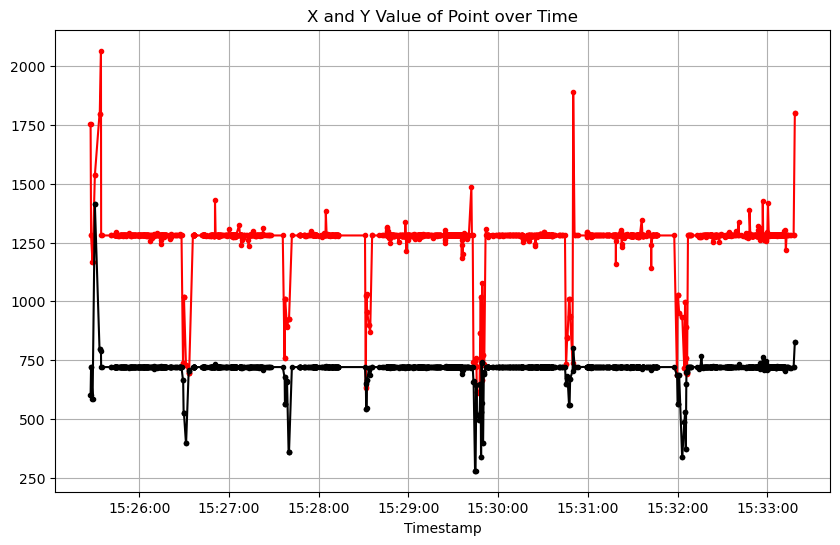

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pytz
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Step 1: Read the CSV file and store it as a DataFrame
df = pd.read_csv('activity_log.csv')

# Step 2: Convert the 'Timestamp' column to a proper datetime format (if not already done)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y, %H:%M:%S.%f')

print(df['Timestamp'])

def extract_x_value(point_str):
    match = re.search(r'x=(\d+)', point_str)
    if match:
        return int(match.group(1))
    return None

def extract_y_value(point_str):
    match = re.search(r'y=(\d+)', point_str)
    if match:
        return int(match.group(1))
    return None

df['X_Value'] = df['Mouse Position'].apply(extract_x_value)
df['Y_Value'] = df['Mouse Position'].apply(extract_y_value)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['X_Value'], marker='.', linestyle='-', color='red')
plt.plot(df['Timestamp'], df['Y_Value'], marker='.', linestyle='-', color='black')

# Customize the plot
plt.xlabel('Timestamp')
plt.title('X and Y Value of Point over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()






27
3
27
6000
DatetimeIndex(['2023-08-04 19:26:14.052573681',
               '2023-08-04 19:26:24.393651724',
               '2023-08-04 19:26:42.508628368',
               '2023-08-04 19:27:00.895182371',
               '2023-08-04 19:29:50.260519743',
               '2023-08-04 19:29:57.278795004',
               '2023-08-04 19:30:38.559807301',
               '2023-08-04 19:31:15.042571783',
               '2023-08-04 19:31:16.783781052',
               '2023-08-04 19:31:16.931439638',
               '2023-08-04 19:31:18.701300383',
               '2023-08-04 19:31:32.655349016',
               '2023-08-04 19:31:33.113917351',
               '2023-08-04 19:31:35.321413279',
               '2023-08-04 19:31:36.433728456',
               '2023-08-04 19:31:37.509721041',
               '2023-08-04 19:31:37.691287756',
               '2023-08-04 19:31:38.688713551',
               '2023-08-04 19:31:43.818593502',
               '2023-08-04 19:31:44.121579409',
               '2023-08-04 

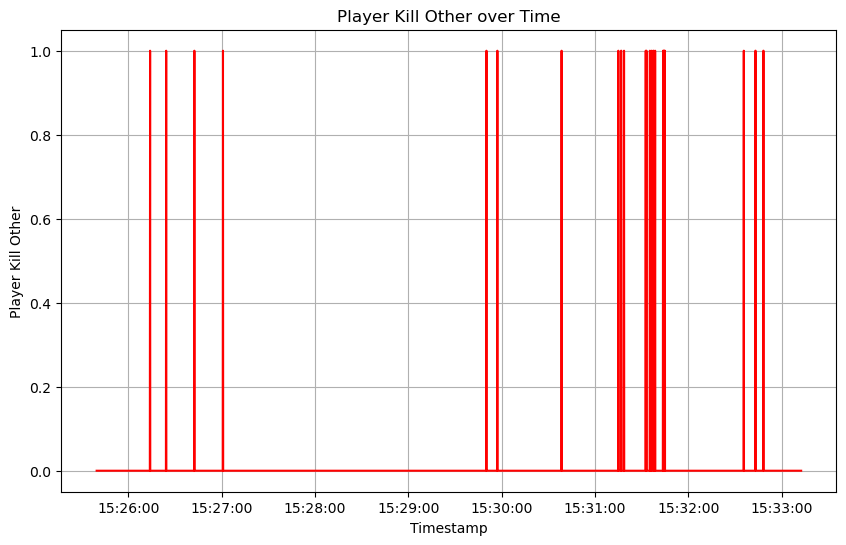

In [2]:
import json

# Step 1: Open the JSON file
with open('data.json', 'r') as json_file:
    # Step 2: Load the JSON data into a Python dictionary
    data = json.load(json_file)

# Step 3: Process and inspect the data
# print(data)


player_kill_data = [entry for entry in data.values() if entry['player_kill_other'] == 1]

print(len(player_kill_data))

player_be_killed = [entry for entry in data.values() if entry['player_get_killed'] == 1]

print(len(player_be_killed))

timestamps_with_player_kill_other = []
timestamps = []
for timestamp, entry in data.items():
    if entry.get('player_kill_other') == 1:
        timestamps_with_player_kill_other.append(timestamp)
    timestamps.append(timestamp)

print(len(timestamps_with_player_kill_other))
print(len(timestamps))


timestamps_kill_proper = pd.to_datetime(timestamps_with_player_kill_other, unit='s')
timestamps_proper = pd.to_datetime(timestamps, unit='s')

print(timestamps_kill_proper)
print(timestamps_proper)

# Create the y-values corresponding to player_kill_other
kill_values = [1 if timestamp in timestamps_kill_proper else 0 for timestamp in timestamps_proper]

# print(y_values)
# Create the plot

plt.figure(figsize=(10, 6))
plt.plot(timestamps_proper, kill_values, linestyle='-', color='red')

# Customize the plot
plt.xlabel('Timestamp')
plt.ylabel('Player Kill Other')
plt.title('Player Kill Other over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

3
3
6000
DatetimeIndex(['2023-08-04 19:28:57.842843294',
               '2023-08-04 19:29:59.788515091',
               '2023-08-04 19:31:52.896595240'],
              dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2023-08-04 19:25:39.676266432',
               '2023-08-04 19:25:43.118897915',
               '2023-08-04 19:25:43.208710194',
               '2023-08-04 19:25:43.292010307',
               '2023-08-04 19:25:43.371627808',
               '2023-08-04 19:25:43.460424423',
               '2023-08-04 19:25:43.552444458',
               '2023-08-04 19:25:43.639768600',
               '2023-08-04 19:25:43.727376461',
               '2023-08-04 19:25:43.827990055',
               ...
               '2023-08-04 19:33:11.813546181',
               '2023-08-04 19:33:11.901617527',
               '2023-08-04 19:33:11.992062807',
               '2023-08-04 19:33:12.079569340',
               '2023-08-04 19:33:12.164353132',
               '2023-08-04 19:33:12.241606474',
          

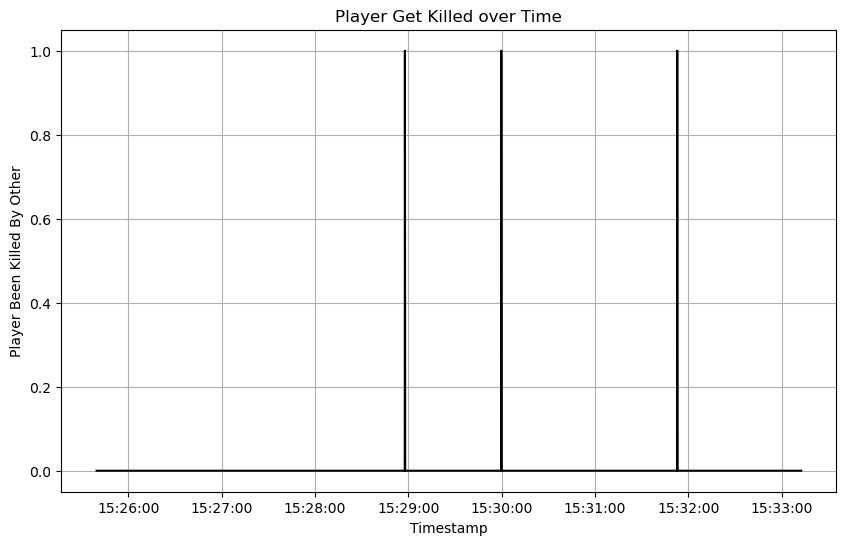

In [3]:


player_be_killed = [entry for entry in data.values() if entry['player_get_killed'] == 1]

print(len(player_be_killed))

timestamps_with_player_been_killed = []
timestamps = []
for timestamp, entry in data.items():
    if entry.get('player_get_killed') == 1:
        timestamps_with_player_been_killed .append(timestamp)
    timestamps.append(timestamp)

print(len(timestamps_with_player_been_killed))
print(len(timestamps))


timestamps_been_killed_proper = pd.to_datetime(timestamps_with_player_been_killed, unit='s')
timestamps_proper = pd.to_datetime(timestamps, unit='s')

print(timestamps_been_killed_proper)
print(timestamps_proper)

# Create the y-values corresponding to player_kill_other
killed_values = [1 if timestamp in timestamps_been_killed_proper else 0 for timestamp in timestamps_proper]

# print(y_values)
# Create the plot

plt.figure(figsize=(10, 6))
plt.plot(timestamps_proper, killed_values, linestyle='-', color='black')

# Customize the plot
# plt.xticks(rotation=45, ha='right')

plt.xlabel('Timestamp')
plt.ylabel('Player Been Killed By Other')
plt.title('Player Get Killed over Time')
plt.grid(True)

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()

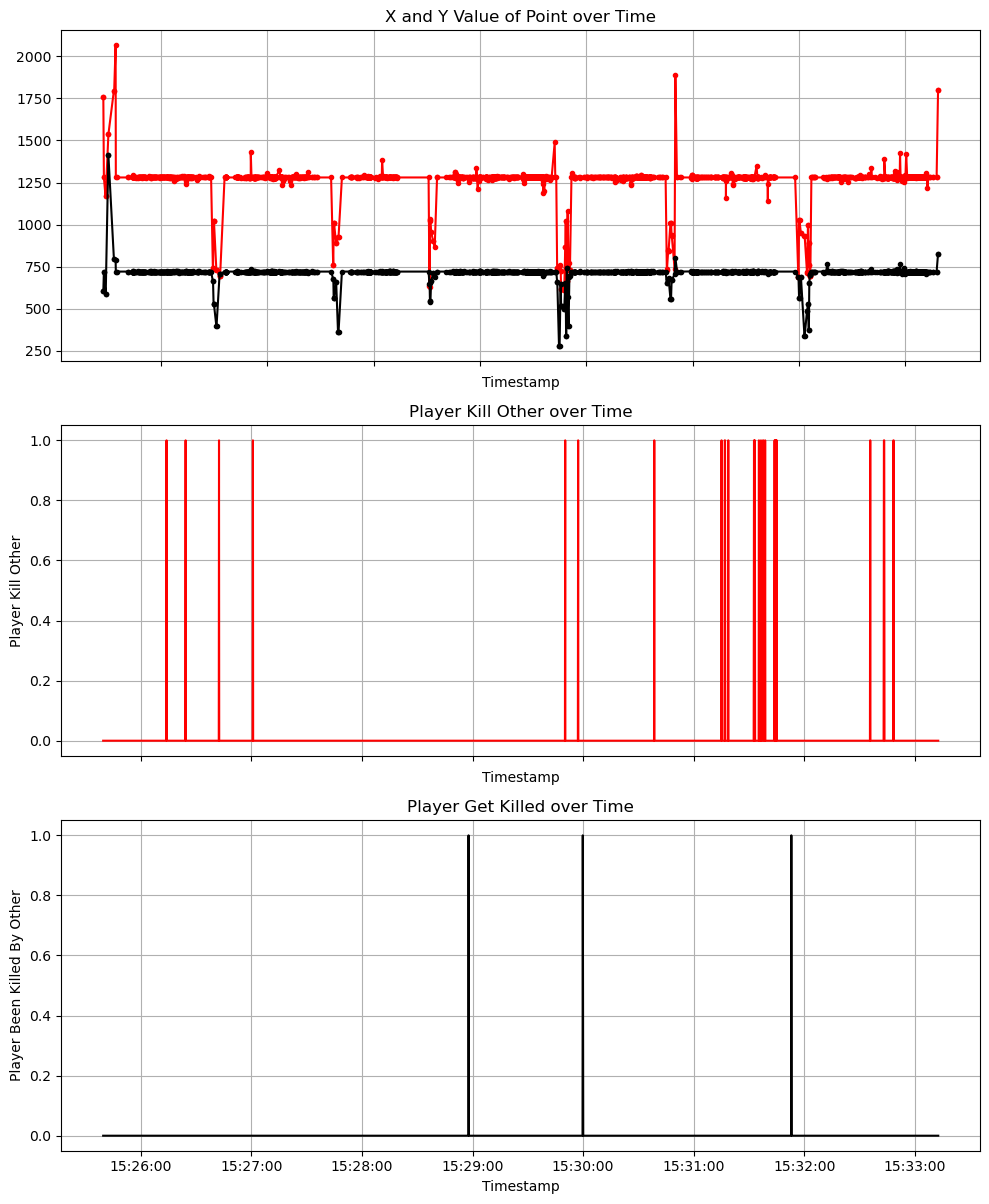

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot the first graph in the first subplot
axs[0].plot(df['Timestamp'], df['X_Value'], marker='.', linestyle='-', color='red')
axs[0].plot(df['Timestamp'], df['Y_Value'], marker='.', linestyle='-', color='black')
axs[0].set_xlabel('Timestamp')
axs[0].set_title('X and Y Value of Point over Time')
axs[0].grid(True)
axs[0].xaxis.set_major_formatter(plt.NullFormatter())

date_form = mdates.DateFormatter("%H:%M:%S", tz=pytz.timezone('US/Eastern'))
# axs[0].gca().xaxis.set_major_formatter(date_form)

# Plot the second graph in the second subplot
# Replace 'y_values' with your data for the second graph
axs[1].plot(timestamps_proper, kill_values, linestyle='-', color='red')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Player Kill Other')
axs[1].set_title('Player Kill Other over Time')
axs[1].grid(True)
axs[1].xaxis.set_major_formatter(plt.NullFormatter())

# Plot the third graph in the third subplot
# Replace 'y_values' with your data for the third graph
axs[2].plot(timestamps_proper, killed_values, linestyle='-', color='black')
axs[2].set_xlabel('Timestamp')
axs[2].set_ylabel('Player Been Killed By Other')
axs[2].set_title('Player Get Killed over Time')
axs[2].grid(True)
axs[2].xaxis.set_major_formatter(plt.NullFormatter())

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(date_form)

# Display the plot
plt.show()